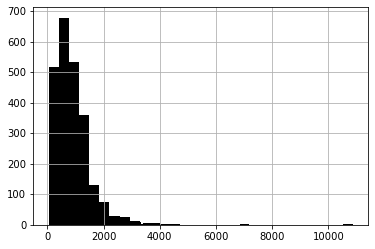

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

gff_files_and_source_urls = {"S_aureus.gff.gz" : "ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/013/425/GCF_000013425.1_ASM1342v1/GCF_000013425.1_ASM1342v1_genomic.gff.gz",
                           "S_typhimurium.gff.gz" : "ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/195/995/GCF_000195995.1_ASM19599v1/GCF_000195995.1_ASM19599v1_genomic.gff.gz",
                           "E_coli.gff.gz":"ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz"}


for gff_file, source_url in gff_files_and_source_urls.items():
    urllib.request.urlretrieve (source_url, gff_file)
    gff_data = pd.read_csv(gff_file,
                       sep="\t", 
                       comment='#', 
                       names=["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"])
 
    gff_data["length"] = gff_data["end"] - gff_data["start"] + 1
    gene_data = gff_data[gff_data["type"] == "gene"]
    gene_data = gene_data[gene_data["strand"] == "+"]
    ax = gene_data["length"].hist(bins=30, color="black")
    #plt.show()
    fig = ax.get_figure()
        
    basename = gff_file.split(".")[0]    
    
    fig.savefig(basename + ".png")